In [28]:
import pandas as pd, matplotlib.pyplot as plt , seaborn as sns, numpy as np, tensorflow as tf

# Loading the data

In [2]:
list_of_df= ['x_train' , 'y_train',
                    'x_test' , 'y_test',
                    'x_val' , 'y_val']

for i, frame in enumerate(list_of_df):
    list_of_df[i]= pd.read_csv( f'content/{list_of_df[i]}.csv').fillna('ffill')

In [3]:
x_train , y_train, x_test , y_test, x_val , y_val = list_of_df
            

In [4]:
y_train.head()

,timestamp,meter_reading
0,2016-01-01,0.277567
1,2016-01-02,0.208450
2,2016-01-03,0.251776
3,2016-01-04,0.397767
4,2016-01-05,0.382355


In [8]:
window_size= 6
train_gen= tf.keras.preprocessing.sequence.TimeseriesGenerator(np.array(x_train.iloc[:,1:]), 
                                                               np.array(y_train.iloc[:,1:]) , 
                                                                length=6 ,sampling_rate=1, 
                                                                stride=1, batch_size=64
                                                                )

val_gen= tf.keras.preprocessing.sequence.TimeseriesGenerator(np.array(x_val.iloc[:,1:]), 
                                                               np.array(y_val.iloc[:,1:]) , 
                                                                length=6 ,sampling_rate=1, 
                                                                stride=1, batch_size=64
                                                                )

test_gen= tf.keras.preprocessing.sequence.TimeseriesGenerator(np.array(x_test.iloc[:,1:]), 
                                                               np.array(y_test.iloc[:,1:]) , 
                                                                length=6 ,sampling_rate=1, 
                                                                stride=1, batch_size=64
                                                                )

In [9]:
model= tf.keras.Sequential([  tf.keras.layers.LSTM( 128 , activation='tanh' ),
        tf.keras.layers.Dense(1) ] )

In [10]:
model.compile(loss='mae', optimizer='adam')

# Fitting the model
history = model.fit(train_gen, validation_data=val_gen, epochs=30)

Epoch 1/30
5/5 [==============================] - 1s 193ms/step - loss: 0.2644 - val_loss: 0.1759
Epoch 2/30
5/5 [==============================] - 0s 17ms/step - loss: 0.2390 - val_loss: 0.1301
Epoch 3/30
5/5 [==============================] - 0s 20ms/step - loss: 0.1896 - val_loss: 0.1752
Epoch 4/30
5/5 [==============================] - 0s 19ms/step - loss: 0.1631 - val_loss: 0.1039
Epoch 5/30
5/5 [==============================] - 0s 16ms/step - loss: 0.1803 - val_loss: 0.1359
Epoch 6/30
5/5 [==============================] - 0s 17ms/step - loss: 0.1777 - val_loss: 0.2162
Epoch 7/30
5/5 [==============================] - 0s 16ms/step - loss: 0.1800 - val_loss: 0.1423
Epoch 8/30
5/5 [==============================] - 0s 19ms/step - loss: 0.1857 - val_loss: 0.1421
Epoch 9/30
5/5 [==============================] - 0s 17ms/step - loss: 0.1464 - val_loss: 0.1590
Epoch 10/30
5/5 [==============================] - 0s 17ms/step - loss: 0.1515 - val_loss: 0.1357
Epoch 11/30
5/5 [===========

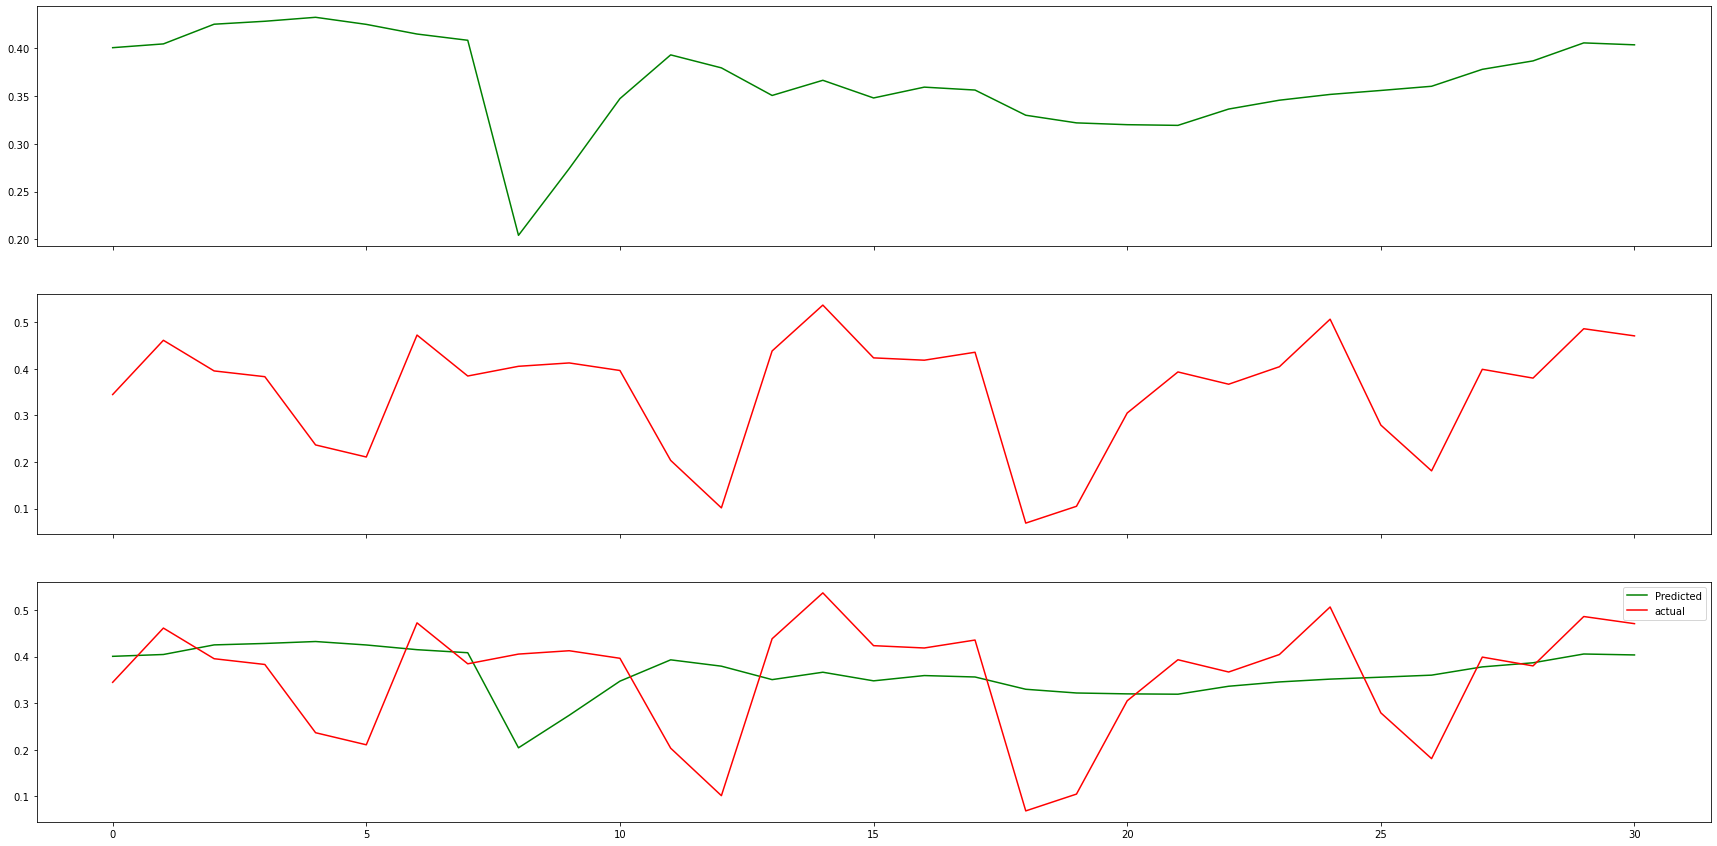

In [29]:
predicted_t=[]
actual_t=[]

predicted_t.extend(model.predict(test_gen[0][0] )  )
actual_t.extend( test_gen[0][1])  
    
fig , (ax1 , ax2, ax) = plt.subplots( 3,1 ,  figsize=(30,15), sharex=True )

ax1.plot(range(len(actual_t)) ,
         predicted_t,
         color='green')

ax2.plot( range(len(actual_t)) ,
          actual_t,
          color='red')


ax.plot(range(len(actual_t)) ,
         predicted_t,
         color='green',
           label='Predicted')

ax.plot( range(len(actual_t)) ,
          actual_t,
          color='red',
           label='actual')

plt.legend()


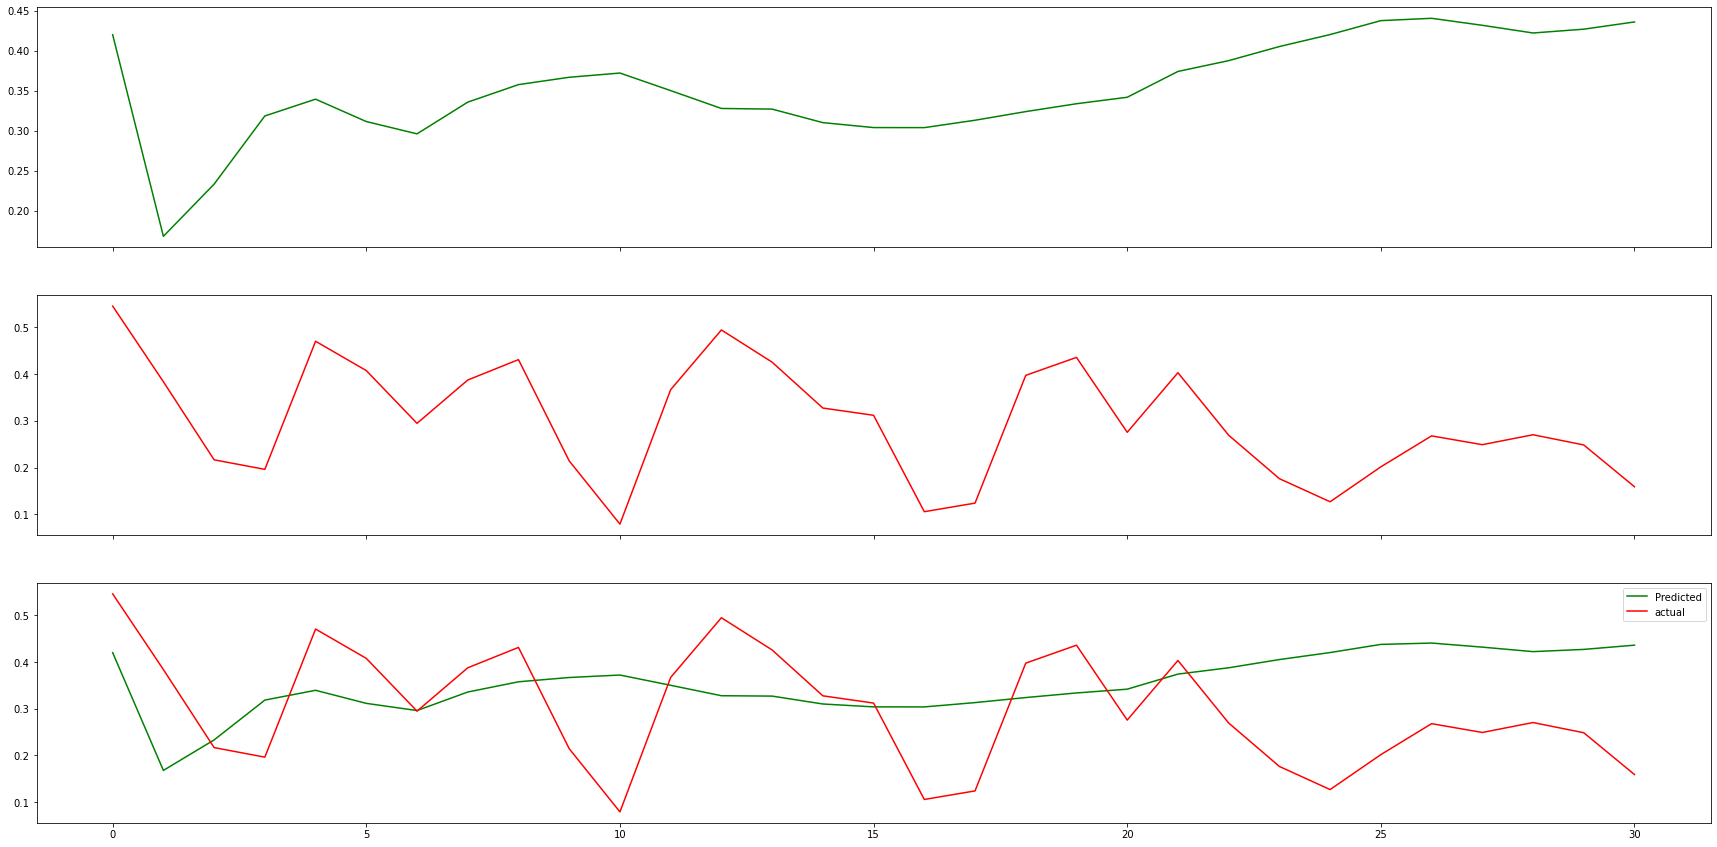

In [36]:
predicted_t=[]
actual_t=[]

predicted_t.extend(model.predict(val_gen[0][0] )  )
actual_t.extend( val_gen[0][1])  
    
fig , (ax1 , ax2, ax) = plt.subplots( 3,1 ,  figsize=(30,15), sharex=True )

ax1.plot(range(len(actual_t)) ,
         predicted_t,
         color='green')

ax2.plot( range(len(actual_t)) ,
          actual_t,
          color='red')


ax.plot(range(len(actual_t)) ,
         predicted_t,
         color='green',
           label='Predicted')

ax.plot( range(len(actual_t)) ,
          actual_t,
          color='red',
           label='actual')

plt.legend()
